In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
%matplotlib inline

In [2]:
meta = pd.read_csv("..//data//potatometadata_forClaudia.csv")
meta.head()

,FieldID,Experiment,field name,diffCSscore,Mean.Control.Microbe,Mean.LowN.Microbe,varCtub,varNtub,varCSscore,invVar_Ctub,...,cladediv0.55,claderich0.6,cladediv0.6,claderich0.7,cladediv0.7,claderich0.8,cladediv0.8,asvrich,asvdiv,PD
0,1,2015,CF1,1.280556,247.26153,218.67840,75.443121,551.385549,1.148148,0.013255,...,4.835654,339,4.887446,370,5.087528,395,5.226187,400,5.230529,31.699375
1,2,2015,CF2,0.762103,221.60938,216.76044,2061.830163,329.386189,0.833558,0.000485,...,4.842094,321,4.898134,337,5.144046,354,5.209358,355,5.211097,26.603089
2,3,2015,CF4,1.089286,260.05795,209.17201,382.961433,853.913357,0.317602,0.002611,...,4.153512,286,4.232498,310,4.453618,340,4.567909,340,4.567909,30.883599
3,4,2015,CF5,3.208333,238.36716,233.20952,452.336408,214.991855,9.159722,0.002211,...,4.511198,249,4.570936,264,4.752686,274,4.784318,274,4.784318,23.384369
4,5,2015,DO1,2.450000,286.36653,252.37100,941.434313,249.128362,4.196667,0.001062,...,4.403219,142,4.414700,154,4.602408,159,4.638410,159,4.638410,19.468832


In [3]:
taxa = pd.read_csv("..//data//potatorar_forsubmission.csv")
taxa.columns.values[0] = "FieldID"
taxa = taxa.rename(columns = {'FieldID':'FieldID'})
taxa.head()

,FieldID,X.f60d1b84853b19fa59e9f6d208e16d96,X.143dd5eba65cad20a08627268e42e7da,X.1d83379743c4c48f1b55deb99f006f2f,X.2b85f692bc205a2ba3826c924566b8d4,X.48a689917bdd4a6d9d3e8a438d88409a,X.60b27b22f60b9ed3c759b818c3e139a5,X.6973d3d7e593cc1b245f3d284f8ac63d,X.6a25639bf80c2a4d67fb5afdb7936527,X.7375b22789de1fc3f7165b84a2f78199,...,X.e1f1df77139a409085c4139eb7ca3b76,X.f1c0ac2d6e23b055ade81be385d9a58d,X.f6234b004dc286131b767f4ba12d18a6,X.f659d34664f3724bfcafe3a0e6e3eaed,X.fa3f3f5e0b7451c8cae261c34053eb27,X.fda7381785bd70780f57b54975ec27ad,X.4092452cccf123b62ba6e23278b18e82,X.b31710a66252a477148f8e3bdfb1505b,X.bafb89b007d809438da956e6ed14f635,X.9ea9bd20eea275e169864132dda04303
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,9,0,0,0,0,0,0,0,0,0


# Preprocessing

In [4]:
import Utils

## update the Utils library
import importlib
importlib.reload(Utils)

<module 'Utils' from 'C:\\Users\\CSY\\Desktop\\potato-lankau\\scripts\\Utils.py'>

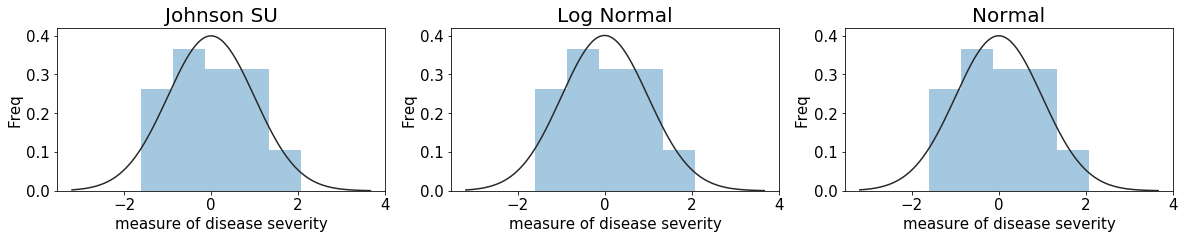

In [5]:
yt_disease, gamma, eta, epsilon, lbda = Utils.johnson_transform(meta.diffCSscore)
Utils.check_dist(yt_disease, xlab="measure of disease severity")

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [7]:
y = meta.diffCSscore
y

0     1.280556
1     0.762103
2     1.089286
3     3.208333
4     2.450000
5     1.646429
6     2.327381
7     0.871230
8     3.471667
9     2.305833
10    0.900000
11    1.614583
12    5.665179
13    3.741000
14    1.375000
15    1.678000
16    0.833000
17    0.987000
18    0.000000
19    0.000000
20    1.010000
21    2.500000
22    0.000000
23    0.000000
24    1.435000
25    0.000000
Name: diffCSscore, dtype: float64

## Using only meta data

In [8]:
# drop non-numeric column
meta_clean = meta.drop(['field name', 'diffCSscore'], axis=1)
# In the new field, experiment conducted in 2015 is labeled as 0 whereas in 2017 as 1
meta_clean['Experiment'] = meta_clean['Experiment'].replace(2015, 0)
meta_clean['Experiment'] = meta_clean['Experiment'].replace(2017, 1)
# drop all column related to yield
yld_list = ['Mean.Control.Microbe', 'Mean.LowN.Microbe', 'varCtub', 'varNtub', 'invVar_Ctub',
           'invVar_Ntub', 'Std.Err.Mean.Control.Microbe', 'Std.Err.Mean.LowN.Microbe', ]
disease_unwanted = ['varCSscore', 'invVar_Csscore', 'seCSscore']
meta_clean = meta_clean.drop(yld_list, axis=1)
meta_clean = meta_clean.drop(disease_unwanted, axis=1)
meta_clean_2 = meta_clean.set_index('FieldID')
meta_clean_2.head(1)

,Experiment,claderich0.1,cladediv0.1,claderich0.15,cladediv0.15,claderich0.2,cladediv0.2,claderich0.25,cladediv0.25,claderich0.3,...,cladediv0.55,claderich0.6,cladediv0.6,claderich0.7,cladediv0.7,claderich0.8,cladediv0.8,asvrich,asvdiv,PD
FieldID,,,,,,,,,,,,,,,,,,,,,
1,0,22,2.276874,40,2.601291,69,2.899249,118,3.239466,167,...,4.835654,339,4.887446,370,5.087528,395,5.226187,400,5.230529,31.699375


In [9]:
meta_clean_2_unnormalized = meta_clean_2.copy()
meta_clean_2, mu_meta, sd_meta = Utils.normalization(meta_clean_2)
xtrain_meta_d, xval_meta_d, ytrain_meta_d, yval_meta_d = train_test_split(meta_clean_2, yt_disease, test_size = 0.2, random_state = 1)

In [10]:
ytrain_d_orig = Utils.johnson_inverse(ytrain_meta_d, gamma, eta, epsilon, lbda)
yval_d_orig = Utils.johnson_inverse(yval_meta_d, gamma, eta, epsilon, lbda)

## Using only taxa data

In [11]:
taxa_clean = taxa.loc[:, (taxa != 0).any(axis=0)]  # drop columns contain only 0
print(taxa_clean.shape)

taxa_clean_2 = taxa_clean.set_index('FieldID')
taxa_clean_2.head(2)

(26, 9892)


,X.f60d1b84853b19fa59e9f6d208e16d96,X.143dd5eba65cad20a08627268e42e7da,X.1d83379743c4c48f1b55deb99f006f2f,X.2b85f692bc205a2ba3826c924566b8d4,X.60b27b22f60b9ed3c759b818c3e139a5,X.6973d3d7e593cc1b245f3d284f8ac63d,X.6a25639bf80c2a4d67fb5afdb7936527,X.7d14d3768b5e662b5d149e118eb1d769,X.9c2f2389f76ceacd02fae2f0bfbd0afb,X.9fa7366dd5f14f5a131b874549c44696,...,X.b21ace384dce2bee9979419021f280b7,X.b8e03ac481f6e7ad4c5bcae9d44ef0ee,X.bdd19e20552367f7068aae7443c1a878,X.dbeb232ebe90883462f226d519318954,X.e1f1df77139a409085c4139eb7ca3b76,X.f1c0ac2d6e23b055ade81be385d9a58d,X.f6234b004dc286131b767f4ba12d18a6,X.f659d34664f3724bfcafe3a0e6e3eaed,X.fa3f3f5e0b7451c8cae261c34053eb27,X.4092452cccf123b62ba6e23278b18e82
FieldID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
taxa_clean_2_unnormalized = taxa_clean_2.copy()
X_taxa, mu_taxa, sd_taxa = Utils.normalization(taxa_clean_2)
X_taxa = pd.concat([meta_clean['Experiment'], X_taxa.reset_index()], axis=1)
X_taxa = X_taxa.set_index('FieldID')
print(X_taxa.shape)
X_taxa.head()

(26, 9892)


,Experiment,X.f60d1b84853b19fa59e9f6d208e16d96,X.143dd5eba65cad20a08627268e42e7da,X.1d83379743c4c48f1b55deb99f006f2f,X.2b85f692bc205a2ba3826c924566b8d4,X.60b27b22f60b9ed3c759b818c3e139a5,X.6973d3d7e593cc1b245f3d284f8ac63d,X.6a25639bf80c2a4d67fb5afdb7936527,X.7d14d3768b5e662b5d149e118eb1d769,X.9c2f2389f76ceacd02fae2f0bfbd0afb,...,X.b21ace384dce2bee9979419021f280b7,X.b8e03ac481f6e7ad4c5bcae9d44ef0ee,X.bdd19e20552367f7068aae7443c1a878,X.dbeb232ebe90883462f226d519318954,X.e1f1df77139a409085c4139eb7ca3b76,X.f1c0ac2d6e23b055ade81be385d9a58d,X.f6234b004dc286131b767f4ba12d18a6,X.f659d34664f3724bfcafe3a0e6e3eaed,X.fa3f3f5e0b7451c8cae261c34053eb27,X.4092452cccf123b62ba6e23278b18e82
FieldID,,,,,,,,,,,,,,,,,,,,,
1,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
2,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
3,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
4,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
5,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,4.902903,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116


In [13]:
xtrain_taxa_d, xval_taxa_d, ytrain_taxa_d, yval_taxa_d = train_test_split(X_taxa, yt_disease, test_size = 0.2, random_state = 1)

## combine two data set

In [14]:
clean = pd.concat([meta_clean_2_unnormalized.drop(['Experiment'], axis=1), taxa_clean_2_unnormalized], axis=1)
total, mu_total, sd_total = Utils.normalization(clean)
total = pd.concat([X_taxa.Experiment, total], axis=1)
total.head()

,Experiment,claderich0.1,cladediv0.1,claderich0.15,cladediv0.15,claderich0.2,cladediv0.2,claderich0.25,cladediv0.25,claderich0.3,...,X.b21ace384dce2bee9979419021f280b7,X.b8e03ac481f6e7ad4c5bcae9d44ef0ee,X.bdd19e20552367f7068aae7443c1a878,X.dbeb232ebe90883462f226d519318954,X.e1f1df77139a409085c4139eb7ca3b76,X.f1c0ac2d6e23b055ade81be385d9a58d,X.f6234b004dc286131b767f4ba12d18a6,X.f659d34664f3724bfcafe3a0e6e3eaed,X.fa3f3f5e0b7451c8cae261c34053eb27,X.4092452cccf123b62ba6e23278b18e82
FieldID,,,,,,,,,,,,,,,,,,,,,
1,0,-0.816933,-0.834312,-0.438802,-0.613301,-0.372269,-0.974633,-0.379977,-1.017165,-0.500798,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
2,0,-1.141212,-1.247924,-0.969446,-1.514288,-0.830749,-1.414816,-0.543905,-1.040303,-0.536069,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
3,0,-0.816933,-1.762260,-0.505133,-1.947435,-0.626980,-1.921612,-0.489262,-1.679134,-0.559582,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
4,0,-0.979072,-1.608700,-1.035777,-2.031462,-0.830749,-1.892107,-0.784333,-1.656125,-0.683030,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
5,0,-0.816933,0.644290,-1.035777,0.143113,-0.754335,0.061178,-0.838975,-0.509260,-0.918167,...,-0.196116,-0.196116,-0.196116,-0.196116,4.902903,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116


In [15]:
xtrain_d, xval_d, ytrain_d, yval_d = train_test_split(total, yt_disease, test_size = 0.2, random_state = 1)

# Data Visualization on Feature Selected

In [16]:
meta_selected = \
['claderich0.1',
 'cladediv0.1',
 'cladediv0.4',
 'claderich0.8']

taxa_selected = \
[
'X.fa9b1e9b54e8be10418ef00bd264b806',
'X.9a863767b07b7bf310cc785fb3253e96',
'X.6551fb3be9725c2f0d631e119b22c331',    
'X.3ae6035cfbb5524a0af4bf8aa642aa11',    
'X.2dc979021700537831de37f56a782f17',    
'X.3826afc21313a34384bc25760a129cd0',    
'X.f60d1b84853b19fa59e9f6d208e16d96',    
'X.8e6421538a6d7567793fc98b1ab81136',   
'X.9e86efdb265fbda2a17f93a3ab66ac2f',   
'X.b3be059be813012cffa0ce669d10b3c4', 
'X.e6008920a330f2d4fdd4dfbd3ae786a6',
'X.1dfe3eac7261d34a2ac811ef43971b7d',
'X.c32df6f5d518885f8849b953f2e018b6'    
]

In [17]:
clean_selected = pd.concat([total.Experiment, clean[meta_selected], clean[taxa_selected]], axis=1)
print(clean_selected.shape)
clean_selected.head(2)

(26, 18)


,Experiment,claderich0.1,cladediv0.1,cladediv0.4,claderich0.8,X.fa9b1e9b54e8be10418ef00bd264b806,X.9a863767b07b7bf310cc785fb3253e96,X.6551fb3be9725c2f0d631e119b22c331,X.3ae6035cfbb5524a0af4bf8aa642aa11,X.2dc979021700537831de37f56a782f17,X.3826afc21313a34384bc25760a129cd0,X.f60d1b84853b19fa59e9f6d208e16d96,X.8e6421538a6d7567793fc98b1ab81136,X.9e86efdb265fbda2a17f93a3ab66ac2f,X.b3be059be813012cffa0ce669d10b3c4,X.e6008920a330f2d4fdd4dfbd3ae786a6,X.1dfe3eac7261d34a2ac811ef43971b7d,X.c32df6f5d518885f8849b953f2e018b6
FieldID,,,,,,,,,,,,,,,,,,
1,0,22,2.276874,4.473499,395,0,0,31,0,0,0,0,0,0,0,62,0,0
2,0,20,2.206943,4.437312,354,0,0,16,0,0,0,0,0,0,0,21,0,0


In [18]:
# Warning: clean_selected, y  (disease score) is before transformation
cor_df = pd.concat([clean_selected.reset_index(), y], axis=1)
cor_df = cor_df.set_index('FieldID')
cor_df.tail(2)

,Experiment,claderich0.1,cladediv0.1,cladediv0.4,claderich0.8,X.fa9b1e9b54e8be10418ef00bd264b806,X.9a863767b07b7bf310cc785fb3253e96,X.6551fb3be9725c2f0d631e119b22c331,X.3ae6035cfbb5524a0af4bf8aa642aa11,X.2dc979021700537831de37f56a782f17,X.3826afc21313a34384bc25760a129cd0,X.f60d1b84853b19fa59e9f6d208e16d96,X.8e6421538a6d7567793fc98b1ab81136,X.9e86efdb265fbda2a17f93a3ab66ac2f,X.b3be059be813012cffa0ce669d10b3c4,X.e6008920a330f2d4fdd4dfbd3ae786a6,X.1dfe3eac7261d34a2ac811ef43971b7d,X.c32df6f5d518885f8849b953f2e018b6,diffCSscore
FieldID,,,,,,,,,,,,,,,,,,,
41,1,29,2.315200,5.498468,786,0,0,55,0,0,21,0,0,0,0,0,5,106,1.435
42,1,36,2.798988,6.258258,1918,0,0,25,0,0,6,2,2,0,0,0,0,0,0.000


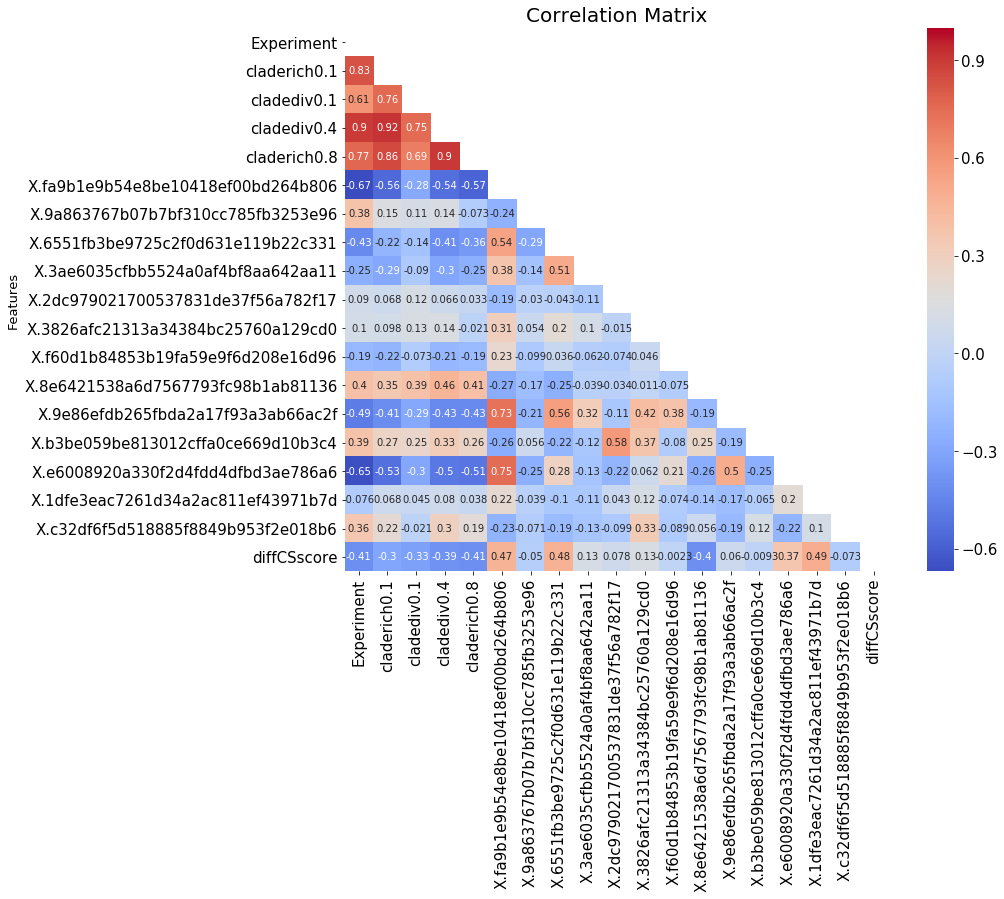

In [19]:
f, ax = plt.subplots(figsize=(14, 10))
ax = Utils.customized_heatmap(X=cor_df.corr(), ax=ax, annot=True, cmap='coolwarm', 
                              title='Correlation Matrix', xticklab=cor_df.columns, ylab='Features', label_size=13)

In [20]:
cor_df.columns.values[-1] = 'disease_severity'
cor_df = cor_df.rename(columns = {'disease_severity':'disease_severity'})
cor_df.tail(2)

,Experiment,claderich0.1,cladediv0.1,cladediv0.4,claderich0.8,X.fa9b1e9b54e8be10418ef00bd264b806,X.9a863767b07b7bf310cc785fb3253e96,X.6551fb3be9725c2f0d631e119b22c331,X.3ae6035cfbb5524a0af4bf8aa642aa11,X.2dc979021700537831de37f56a782f17,X.3826afc21313a34384bc25760a129cd0,X.f60d1b84853b19fa59e9f6d208e16d96,X.8e6421538a6d7567793fc98b1ab81136,X.9e86efdb265fbda2a17f93a3ab66ac2f,X.b3be059be813012cffa0ce669d10b3c4,X.e6008920a330f2d4fdd4dfbd3ae786a6,X.1dfe3eac7261d34a2ac811ef43971b7d,X.c32df6f5d518885f8849b953f2e018b6,disease_severity
FieldID,,,,,,,,,,,,,,,,,,,
41,1,29,2.315200,5.498468,786,0,0,55,0,0,21,0,0,0,0,0,5,106,1.435
42,1,36,2.798988,6.258258,1918,0,0,25,0,0,6,2,2,0,0,0,0,0,0.000


In [21]:
selected_trans = cor_df.copy()
selected_trans = selected_trans.drop(['Experiment'], axis=1)
selected_trans, mu_selected, sd_selected = Utils.normalization(selected_trans)
selected_trans = pd.concat([X_taxa.Experiment, selected_trans], axis=1)  # concat experiment 0/1 indicator
selected_trans = pd.concat([selected_trans.reset_index(), yt_disease], axis=1)  # concat johnson_transform y
selected_trans = selected_trans.set_index('FieldID')
selected_trans.tail(2)

,Experiment,claderich0.1,cladediv0.1,cladediv0.4,claderich0.8,X.fa9b1e9b54e8be10418ef00bd264b806,X.9a863767b07b7bf310cc785fb3253e96,X.6551fb3be9725c2f0d631e119b22c331,X.3ae6035cfbb5524a0af4bf8aa642aa11,X.2dc979021700537831de37f56a782f17,X.3826afc21313a34384bc25760a129cd0,X.f60d1b84853b19fa59e9f6d208e16d96,X.8e6421538a6d7567793fc98b1ab81136,X.9e86efdb265fbda2a17f93a3ab66ac2f,X.b3be059be813012cffa0ce669d10b3c4,X.e6008920a330f2d4fdd4dfbd3ae786a6,X.1dfe3eac7261d34a2ac811ef43971b7d,X.c32df6f5d518885f8849b953f2e018b6,disease_severity,diffCSscore
FieldID,,,,,,,,,,,,,,,,,,,,
41,1,0.318043,-0.607624,0.683326,0.400150,-0.656285,-0.470743,-0.368436,-0.293188,-0.352591,0.560934,-0.202122,-0.391070,-0.476785,-0.378889,-0.64082,0.396515,4.430830,-0.108882,0.142125
42,1,1.453018,2.253805,1.761641,2.791948,-0.656285,-0.470743,-0.746568,-0.293188,-0.352591,-0.621576,-0.049798,0.805145,-0.476785,-0.378889,-0.64082,-0.350542,-0.422655,-1.166365,-1.605319


In [22]:
selected_trans.columns.values[-1] = 'disease_transform'
selected_trans = selected_trans.rename(columns = {'disease_transform':'disease_transform'})
selected_trans.tail(2)

,Experiment,claderich0.1,cladediv0.1,cladediv0.4,claderich0.8,X.fa9b1e9b54e8be10418ef00bd264b806,X.9a863767b07b7bf310cc785fb3253e96,X.6551fb3be9725c2f0d631e119b22c331,X.3ae6035cfbb5524a0af4bf8aa642aa11,X.2dc979021700537831de37f56a782f17,X.3826afc21313a34384bc25760a129cd0,X.f60d1b84853b19fa59e9f6d208e16d96,X.8e6421538a6d7567793fc98b1ab81136,X.9e86efdb265fbda2a17f93a3ab66ac2f,X.b3be059be813012cffa0ce669d10b3c4,X.e6008920a330f2d4fdd4dfbd3ae786a6,X.1dfe3eac7261d34a2ac811ef43971b7d,X.c32df6f5d518885f8849b953f2e018b6,disease_severity,disease_transform
FieldID,,,,,,,,,,,,,,,,,,,,
41,1,0.318043,-0.607624,0.683326,0.400150,-0.656285,-0.470743,-0.368436,-0.293188,-0.352591,0.560934,-0.202122,-0.391070,-0.476785,-0.378889,-0.64082,0.396515,4.430830,-0.108882,0.142125
42,1,1.453018,2.253805,1.761641,2.791948,-0.656285,-0.470743,-0.746568,-0.293188,-0.352591,-0.621576,-0.049798,0.805145,-0.476785,-0.378889,-0.64082,-0.350542,-0.422655,-1.166365,-1.605319


For the last two columns of dataframe selected_trans:  
disease_severity: y after normalization  
disease_transform: y after johnson_transform  

In [98]:
def feature_disease(ax, df, x, y='disease_severity', trendline=True, xlab='', ylab='Disease Severity', title='', fontsize=15):
    ax.scatter(df[x], df[y])
    if trendline:
        z = np.polyfit(df[x], df[y], 1)
        p = np.poly1d(z)
        ax.plot(df[x],p(df[x]),"r--")
    ax.set_xlabel(xlab, fontsize=fontsize)
    ax.set_ylabel(ylab, fontsize=fontsize)
    ax.set_title(title, size=fontsize+5)

In [97]:
# using seaborn to draw line
def feature_disease2(ax, df, x, y='disease_severity', xlab='', ylab='Disease Severity', title='', fontsize=15):
    sns.lmplot(x=x, y=y, data=df, ci=None)

    ax.set_xlabel(xlab, fontsize=fontsize)
    ax.set_ylabel(ylab, fontsize=fontsize)
    ax.set_title(title, size=fontsize+5)

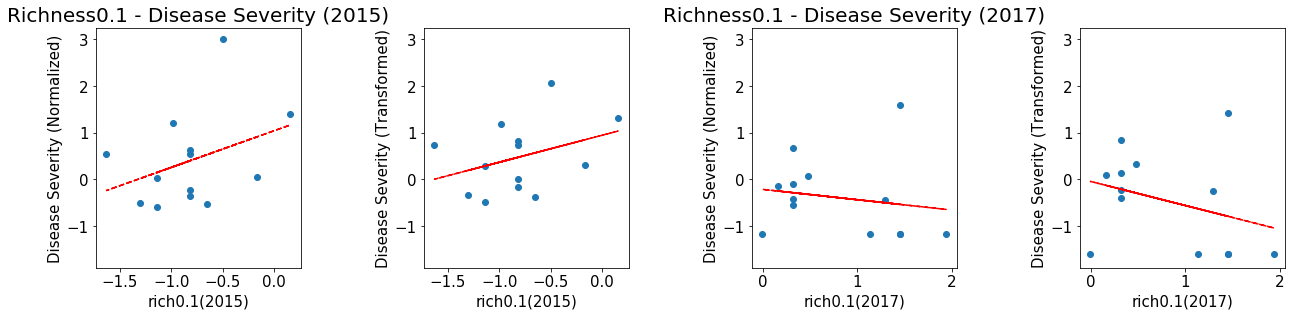

In [96]:
# demo
fig = plt.figure(figsize=(18, 20))
ax1 = fig.add_subplot(4,4,1)
feature_disease2(ax1, df=selected_trans[selected_trans['Experiment']==0], x='claderich0.1',  
                xlab='rich0.1(2015)', ylab='Disease Severity (Normalized)', title='Richness0.1 - Disease Severity (2015)')
ax2 = fig.add_subplot(4,4,2,sharey=ax1)
feature_disease2(ax2, df=selected_trans[selected_trans['Experiment']==0], x='claderich0.1', y='disease_transform',
                xlab='rich0.1(2015)', ylab='Disease Severity (Transformed)', title='')
ax3 = fig.add_subplot(4,4,3,sharey=ax1)
feature_disease2(ax3, df=selected_trans[selected_trans['Experiment']==1], x='claderich0.1', 
                xlab='rich0.1(2017)',  ylab='Disease Severity (Normalized)', title='Richness0.1 - Disease Severity (2017)')
ax4 = fig.add_subplot(4,4,4,sharey=ax1)
feature_disease2(ax4, df=selected_trans[selected_trans['Experiment']==1], x='claderich0.1', y='disease_transform',
                xlab='rich0.1(2017)',  ylab='Disease Severity (Transformed)', title='')
fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.6, hspace=0.35)
plt.show()

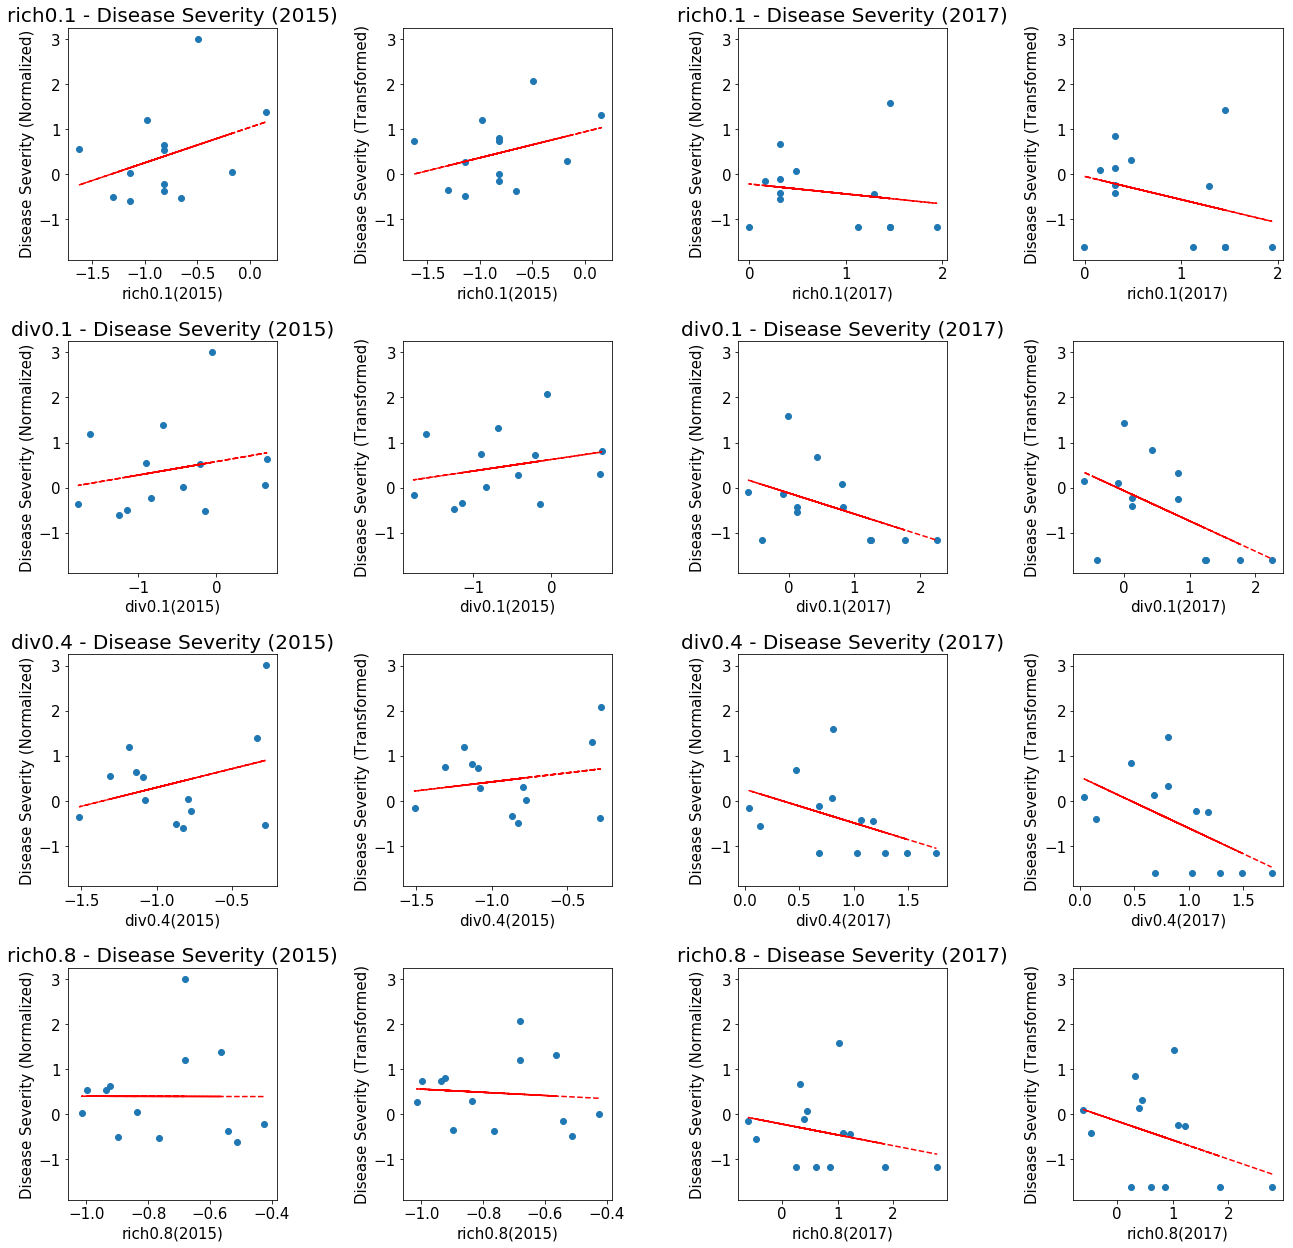

In [99]:
fig = plt.figure(figsize=(18, 20))
leng = len(meta_selected)
for i in range(leng):
    yr0 = "(2015)"
    yr1 = "(2017)"
    xlab0 = meta_selected[i][5:] + yr0
    xlab1 = meta_selected[i][5:] + yr1
    ylab0 = 'Disease Severity (Normalized)'
    ylab1 = 'Disease Severity (Transformed)'
    title0 = meta_selected[i][5:] + " - Disease Severity " + yr0
    title1 = meta_selected[i][5:] + " - Disease Severity " + yr1
    
    ax1 = fig.add_subplot(leng, 4, 4*i+1)
    feature_disease(ax1, df=selected_trans[selected_trans['Experiment']==0], x=meta_selected[i], xlab=xlab0, ylab=ylab0, title=title0)
    ax2 = fig.add_subplot(leng, 4, 4*i+2, sharey=ax1)
    feature_disease(ax2, df=selected_trans[selected_trans['Experiment']==0], x=meta_selected[i], y='disease_transform', 
                    xlab=xlab0, ylab=ylab1)
    ax3 = fig.add_subplot(leng, 4, 4*i+3, sharey=ax1)
    feature_disease(ax3, df=selected_trans[selected_trans['Experiment']==1], x=meta_selected[i], xlab=xlab1, ylab=ylab0, title=title1)
    ax4 = fig.add_subplot(leng, 4, 4*i+4, sharey=ax1)
    feature_disease(ax4, df=selected_trans[selected_trans['Experiment']==1], x=meta_selected[i], y='disease_transform',
                    xlab=xlab1, ylab=ylab1)

fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.6, hspace=0.35)
plt.show()

This is very interesting. At first glance, it seems that it is always the case of positive relationship between richness/diversity and disease severity in 2015, whereas negative relationship in 2017.  

However, when we take a closer look, it turns out that all fields in 2017 has higher richness/diversity than those in 2015. It follows that all fields in 2017 have positive richness/diversity after normalization. On the other hand, all fields in 2015 have negative rich/div.  

Thus, my hypothesis is that disease severity has strong positive relationship with the absolute value of rich/div.

# Outlier Analysis

In [29]:
# credit to https://stackoverflow.com/questions/58220589/marking-outliers-on-a-scatter-plot
def estimate_gaussian(dataset):
    mu = np.mean(dataset) # moyenne cf mu
    sigma = np.std(dataset) # standard deviation
    limit = sigma * 1.5
    min_threshold = mu - limit
    max_threshold = mu + limit

    return mu, sigma, min_threshold, max_threshold

In [100]:
def label_outlier(ax, df, x, y='disease_severity', outlier=None, 
                  xlab='', ylab='Disease Severity', title='', fontsize=15):
    length = len(df[y])
    for i in range(length):
        x_ = df[x][i:i+1].values
        y_ = df[y][i:i+1].values
        index = df[x][i:i+1].index.values
#         known bugs: cannot conduct element wise comparison
#         print("x_", x_, "y_", y_, "index", index, "is equal outlier:", y in outlier)
#         if y in outlier:
#             ax.scatter(x_, y_, marker="x", color="red")
#             ax.text(x_+0.2, y_+0.3, index)
#         else:
#             ax.scatter(x_, y_)
        ax.scatter(x_, y_, marker="x", color="black")
        ax.text(x_, y_, index)
    ax.set_xlabel(xlab, fontsize=fontsize)
    ax.set_ylabel(ylab, fontsize=fontsize)
    ax.set_title(title, size=fontsize+5)

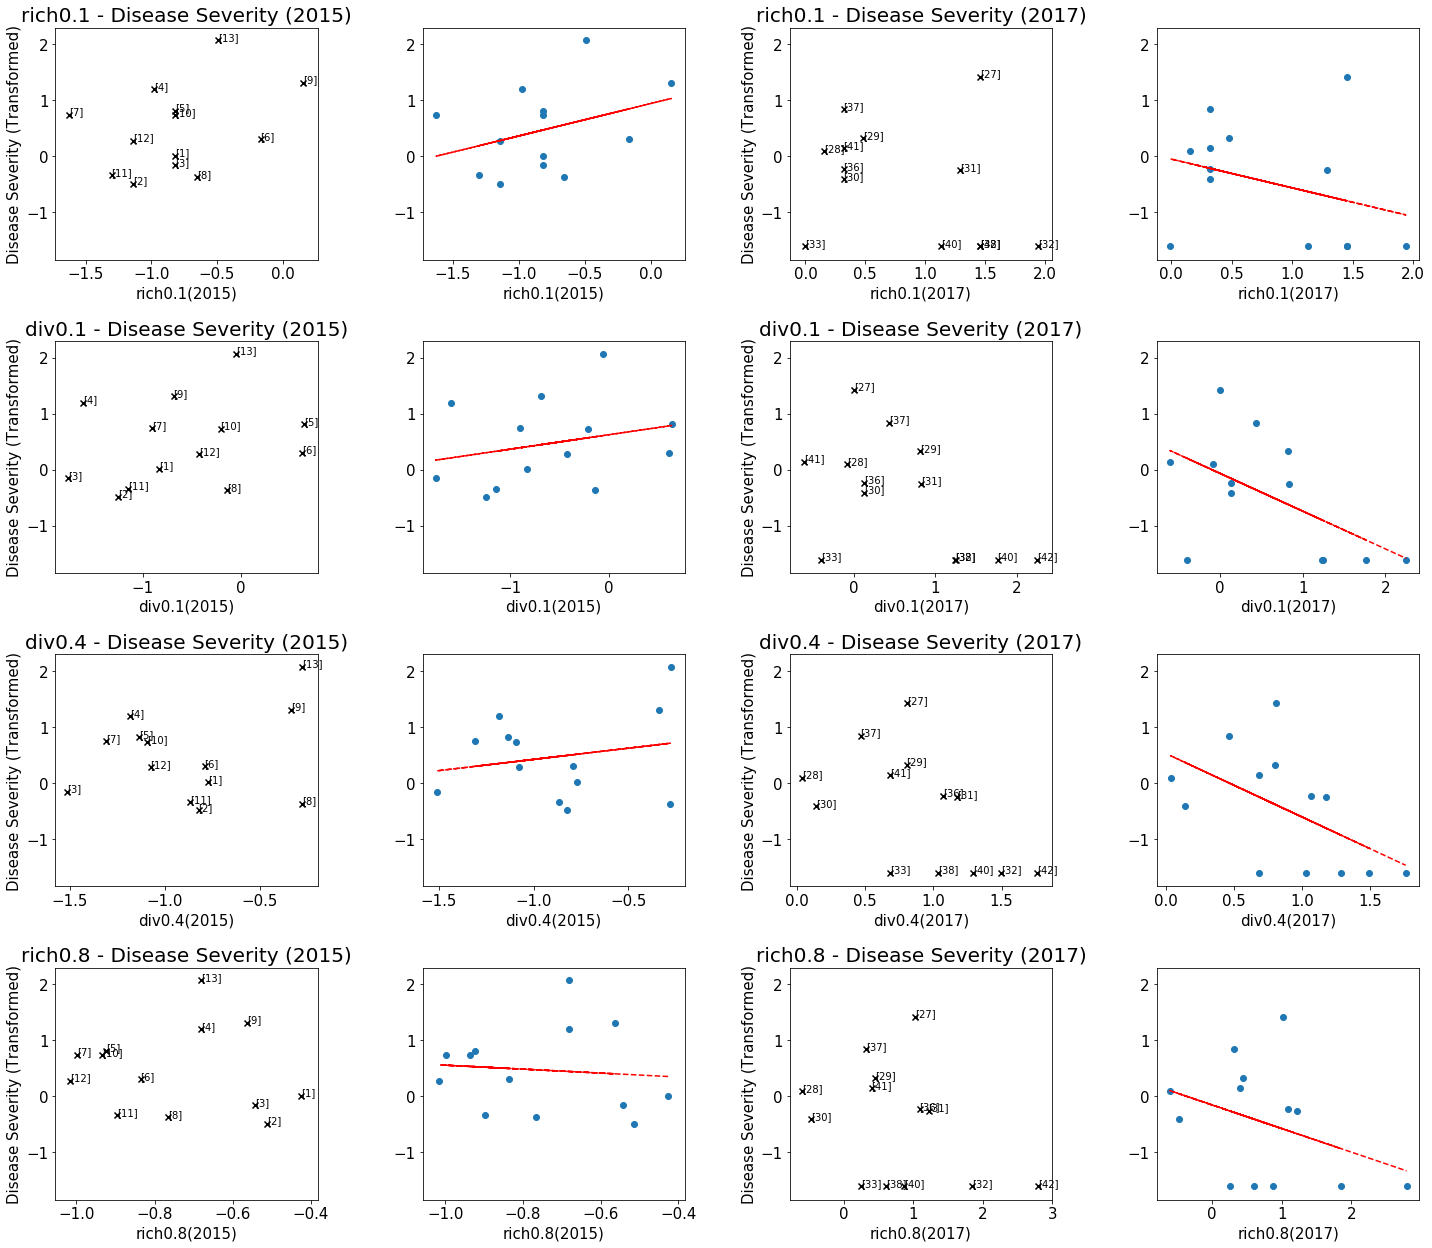

In [113]:
fig = plt.figure(figsize=(20, 20))
leng = len(meta_selected)
for i in range(leng):
    yr0 = "(2015)"
    yr1 = "(2017)"
    xlab0 = meta_selected[i][5:] + yr0
    xlab1 = meta_selected[i][5:] + yr1
    ylab0 = 'Disease Severity (Transformed)'
    ylab1 = ''
    title0 = meta_selected[i][5:] + " - Disease Severity " + yr0
    title1 = meta_selected[i][5:] + " - Disease Severity " + yr1
    
    # For each row, the first and the third plot are labeled with FieldID
    ax1 = fig.add_subplot(leng, 4, 4*i+1)
    label_outlier(ax1, df=selected_trans[selected_trans['Experiment']==0], x=meta_selected[i], y='disease_transform', 
                  xlab=xlab0, ylab=ylab0, title=title0)
    ax2 = fig.add_subplot(leng, 4, 4*i+2, sharey=ax1)
    feature_disease(ax2, df=selected_trans[selected_trans['Experiment']==0], x=meta_selected[i], y='disease_transform', 
                    xlab=xlab0, ylab=ylab1)
    ax3 = fig.add_subplot(leng, 4, 4*i+3, sharey=ax1)
    label_outlier(ax3, df=selected_trans[selected_trans['Experiment']==1], x=meta_selected[i], y='disease_transform', 
                  xlab=xlab1, ylab=ylab0, title=title1)
    ax4 = fig.add_subplot(leng, 4, 4*i+4, sharey=ax1)
    feature_disease(ax4, df=selected_trans[selected_trans['Experiment']==1], x=meta_selected[i], y='disease_transform',
                    xlab=xlab1, ylab=ylab1)

fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.4, hspace=0.35)
plt.show()

In 2015, Field 1-8 and Field 13 may appear as outliers sometimes.  
In 2017, Field 27 and 33 constant serve as outliers. 

## rich 0.1

In [30]:
mu1, sigma1, min_threshold1, max_threshold1 = estimate_gaussian(selected_trans[selected_trans['Experiment']==1]['disease_transform'])
low1 = (selected_trans[selected_trans['Experiment']==1]['disease_transform'] < min_threshold1)
high1 = (selected_trans[selected_trans['Experiment']==1]['disease_transform'] > max_threshold1)

outliers1 = np.extract(low1, selected_trans[selected_trans['Experiment']==1]['disease_transform'])
outliers2 = np.extract(high1, selected_trans[selected_trans['Experiment']==1]['disease_transform'])
outliers = np.concatenate((outliers1, outliers2), axis=0)

In [58]:
outliers

array([1.4243438])

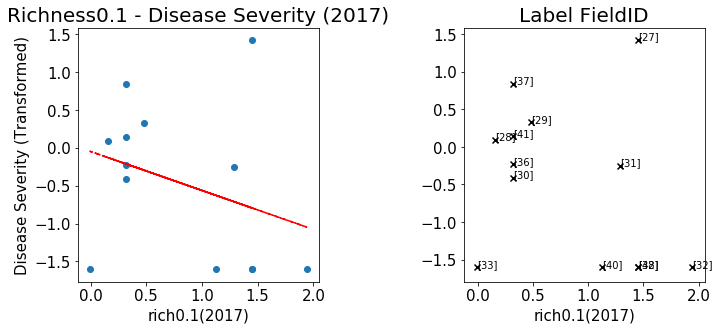

In [107]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
feature_disease(ax, df=selected_trans[selected_trans['Experiment']==1], x='claderich0.1', y='disease_transform',
                xlab='rich0.1(2017)', ylab='Disease Severity (Transformed)', title='Richness0.1 - Disease Severity (2017)')
ax2 = fig.add_subplot(122)
label_outlier(ax2, df=selected_trans[selected_trans['Experiment']==1], x='claderich0.1', y='disease_transform', 
                xlab='rich0.1(2017)', ylab='', title='Label FieldID')
fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.6, hspace=0.35)
plt.show()

outlier: 27, 33

C:\Users\CSY\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
C:\Users\CSY\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
C:\Users\CSY\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
C:\Users\CSY\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
C:\Users\CSY\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


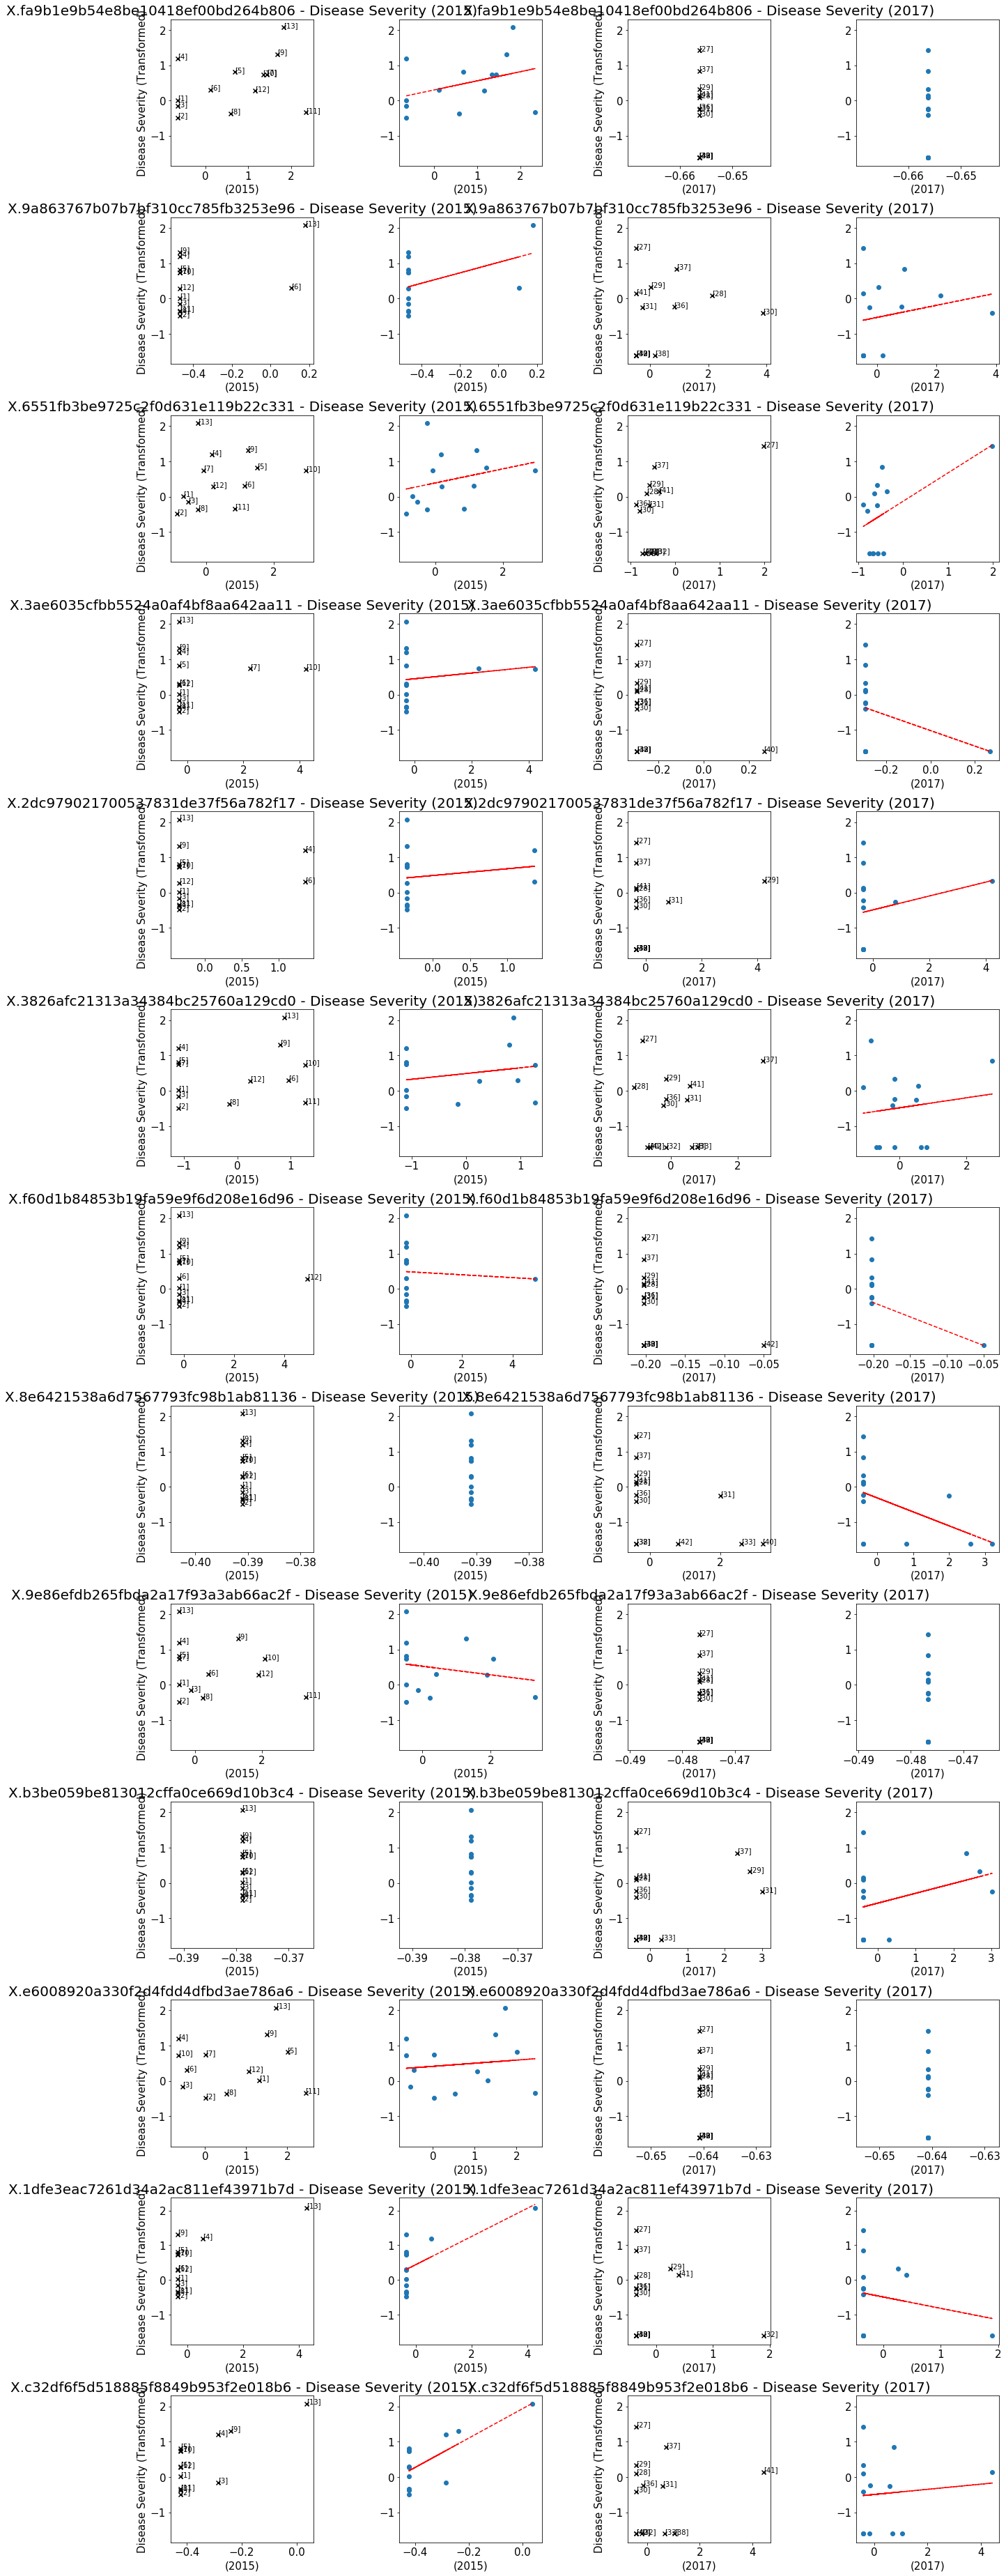

In [117]:
fig = plt.figure(figsize=(20, 60))
leng = len(taxa_selected)
for i in range(leng):
    yr0 = "(2015)"
    yr1 = "(2017)"
    xlab0 = yr0
    xlab1 = yr1
    ylab0 = 'Disease Severity (Transformed)'
    ylab1 = ''
    title0 = taxa_selected[i] + " - Disease Severity " + yr0
    title1 = taxa_selected[i] + " - Disease Severity " + yr1
    
    # For each row, the first and the third plot are labeled with FieldID
    ax1 = fig.add_subplot(leng, 4, 4*i+1)
    label_outlier(ax1, df=selected_trans[selected_trans['Experiment']==0], x=taxa_selected[i], y='disease_transform', 
                  xlab=xlab0, ylab=ylab0, title=title0)
    ax2 = fig.add_subplot(leng, 4, 4*i+2, sharey=ax1)
    feature_disease(ax2, df=selected_trans[selected_trans['Experiment']==0], x=taxa_selected[i], y='disease_transform', 
                    xlab=xlab0, ylab=ylab1)
    ax3 = fig.add_subplot(leng, 4, 4*i+3, sharey=ax1)
    label_outlier(ax3, df=selected_trans[selected_trans['Experiment']==1], x=taxa_selected[i], y='disease_transform', 
                  xlab=xlab1, ylab=ylab0, title=title1)
    ax4 = fig.add_subplot(leng, 4, 4*i+4, sharey=ax1)
    feature_disease(ax4, df=selected_trans[selected_trans['Experiment']==1], x=taxa_selected[i], y='disease_transform',
                    xlab=xlab1, ylab=ylab1)

fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.6, hspace=0.35)
plt.show()

C:\Users\CSY\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


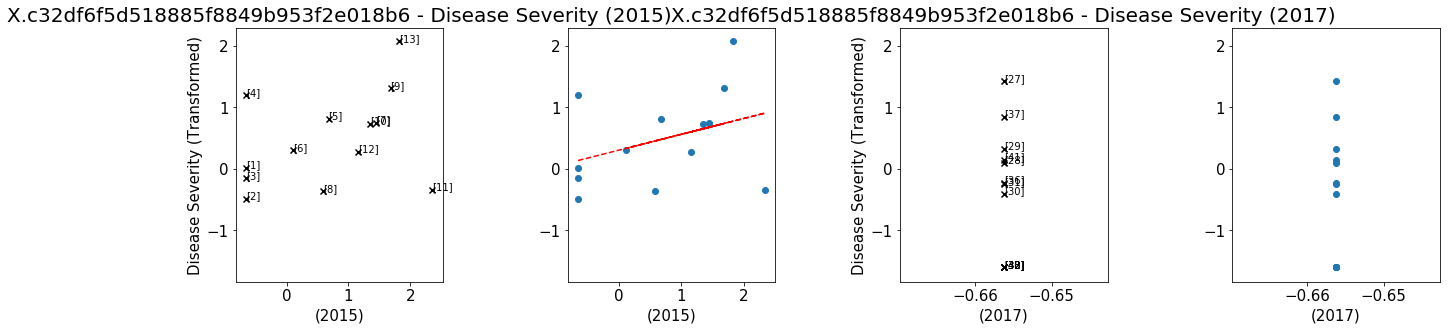

In [119]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(141)
label_outlier(ax1, df=selected_trans[selected_trans['Experiment']==0], x=taxa_selected[0], y='disease_transform', 
                  xlab=xlab0, ylab=ylab0, title=title0)
ax2 = fig.add_subplot(1, 4, 2, sharey=ax1)
feature_disease(ax2, df=selected_trans[selected_trans['Experiment']==0], x=taxa_selected[0], y='disease_transform', 
                    xlab=xlab0, ylab=ylab1)
ax3 = fig.add_subplot(1, 4, 3, sharey=ax1)
label_outlier(ax3, df=selected_trans[selected_trans['Experiment']==1], x=taxa_selected[0], y='disease_transform', 
                  xlab=xlab1, ylab=ylab0, title=title1)
ax4 = fig.add_subplot(1, 4, 4, sharey=ax1)
feature_disease(ax4, df=selected_trans[selected_trans['Experiment']==1], x=taxa_selected[0], y='disease_transform',
                    xlab=xlab1, ylab=ylab1)
fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0.6, hspace=0.35)
plt.show()

In [121]:
tmp1 = selected_trans[selected_trans['Experiment']==0]
tmp1[taxa_selected[0]]

FieldID
1    -0.656285
2    -0.656285
3    -0.656285
4    -0.656285
5     0.678283
6     0.106325
7     1.440893
8     0.582957
9     1.679209
10    1.345567
11    2.346493
12    1.154914
13    1.822198
Name: X.fa9b1e9b54e8be10418ef00bd264b806, dtype: float64

In [122]:
tmp2 = selected_trans[selected_trans['Experiment']==1]
tmp2[taxa_selected[0]]

FieldID
27   -0.656285
28   -0.656285
29   -0.656285
30   -0.656285
31   -0.656285
32   -0.656285
33   -0.656285
36   -0.656285
37   -0.656285
38   -0.656285
40   -0.656285
41   -0.656285
42   -0.656285
Name: X.fa9b1e9b54e8be10418ef00bd264b806, dtype: float64

This is to verify that the plots are not error. The reason that so many dots forming a vertical line is that the data includes so many 0s.